Шишка Антон (Варіант 30)

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Зчитайте дані з таблиці "Середньорічна щомісячна зарплата в Україні за 1992—2022 роки" з Вікіпедії за посиланням  та виконайте наступні завдання

In [186]:
url = 'https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96'
df = pd.read_html(url, header=0)[2]

1. Виведіть перші 5 рядків:

In [187]:
print(df.head(5))

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


2. Визначте кількість рядків і стовпчиків за допомогою атрибуту shape

In [188]:
rows, cols = df.shape
print(f"Кількість рядків: {rows}, Кількість стовпчиків: {cols}")

Кількість рядків: 32, Кількість стовпчиків: 5


3. Визначте загальну кількість років та кількість місяців у даних.

In [189]:
total_years = df['Рік'].nunique()
total_months = df.shape[0]
print(f"Загальна кількість років: {total_years}, Кількість місяців: {total_months}")

Загальна кількість років: 32, Кількість місяців: 32


4. Замінити пропущені значення  «-» в таблиці на NaN

In [190]:
df = df.replace('—', pd.NA)
print(df)

      Рік В національній валюті В доларах США  \
0    1992              5832,88▲        28,04▼   
1    1993               163533▲        36,03▲   
2    1994              1426343▲        44,99▲   
3    1995              7304000▲        49,53▲   
4    1996               125,23▼        68,45▲   
5    1997               143,09▲        76,86▲   
6    1998               152,83▲        62,39▼   
7    1999               177,39▲        42,95▼   
8    2000               231,04▲        42,47▼   
9    2001               311,62▲        58,01▲   
10   2002               375,98▲        70,59▲   
11   2003               462,58▲        86,74▲   
12   2004               590,53▲       111,02▲   
13   2005               806,14▲       157,30▲   
14   2006              1042,88▲       206,51▲   
15   2007              1352,75▲       267,87▲   
16   2008              1808,92▲       343,43▲   
17   2009              1909,25▲       245,05▼   
18   2010              2246,75▲       283,12▲   
19   2011           

5. Визначити тип стовпців за допомогою dtypes.

In [191]:
print(df.dtypes)

Рік                                           object
В національній валюті                         object
В доларах США                                 object
Кількість кг хліба[20] на середню зарплату    object
Кількість БігМаків на середню зарплату        object
dtype: object


6. Видаліть передостанній і останній стовпчики ( Кількість кгхліба[20] на середнюзарплату,  Кільксть БігМаків на середню зарплату). Далі працюйте з оновленою таблицею

In [192]:
df = df.iloc[:, :-2]
print(df)

      Рік В національній валюті В доларах США
0    1992              5832,88▲        28,04▼
1    1993               163533▲        36,03▲
2    1994              1426343▲        44,99▲
3    1995              7304000▲        49,53▲
4    1996               125,23▼        68,45▲
5    1997               143,09▲        76,86▲
6    1998               152,83▲        62,39▼
7    1999               177,39▲        42,95▼
8    2000               231,04▲        42,47▼
9    2001               311,62▲        58,01▲
10   2002               375,98▲        70,59▲
11   2003               462,58▲        86,74▲
12   2004               590,53▲       111,02▲
13   2005               806,14▲       157,30▲
14   2006              1042,88▲       206,51▲
15   2007              1352,75▲       267,87▲
16   2008              1808,92▲       343,43▲
17   2009              1909,25▲       245,05▼
18   2010              2246,75▲       283,12▲
19   2011              2639,17▲       331,24▲
20   2012              3031,92▲   

7. Замінити тип нечислових даних на числові.

In [193]:
for column in df.columns[1:]:
    df[column] = df[column].str.replace('▼', '').str.replace('▲', '').str.replace(',', '.')

#df['Рік'] = pd.to_numeric(df['Рік'], errors='coerce')
df['В національній валюті'] = pd.to_numeric(df['В національній валюті'], errors='coerce')
df['В доларах США'] = pd.to_numeric(df['В доларах США'], errors='coerce')
print(df)

      Рік  В національній валюті  В доларах США
0    1992                5832.88          28.04
1    1993              163533.00          36.03
2    1994             1426343.00          44.99
3    1995             7304000.00          49.53
4    1996                 125.23          68.45
5    1997                 143.09          76.86
6    1998                 152.83          62.39
7    1999                 177.39          42.95
8    2000                 231.04          42.47
9    2001                 311.62          58.01
10   2002                 375.98          70.59
11   2003                 462.58          86.74
12   2004                 590.53         111.02
13   2005                 806.14         157.30
14   2006                1042.88         206.51
15   2007                1352.75         267.87
16   2008                1808.92         343.43
17   2009                1909.25         245.05
18   2010                2246.75         283.12
19   2011                2639.17        

8. Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len)

In [205]:
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

Рік                      0.0
В національній валюті    0.0
В доларах США            0.0
dtype: float64


9. Замініть всі пропущені значення на середні значення по (стовпцю).

In [195]:
df = df.fillna(df.mean())
print(df)

      Рік  В національній валюті  В доларах США
0    1992                5832.88          28.04
1    1993              163533.00          36.03
2    1994             1426343.00          44.99
3    1995             7304000.00          49.53
4    1996                 125.23          68.45
5    1997                 143.09          76.86
6    1998                 152.83          62.39
7    1999                 177.39          42.95
8    2000                 231.04          42.47
9    2001                 311.62          58.01
10   2002                 375.98          70.59
11   2003                 462.58          86.74
12   2004                 590.53         111.02
13   2005                 806.14         157.30
14   2006                1042.88         206.51
15   2007                1352.75         267.87
16   2008                1808.92         343.43
17   2009                1909.25         245.05
18   2010                2246.75         283.12
19   2011                2639.17        

<ipython-input-195-8a0446905b17>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


10. Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.

In [196]:
#Видалив записи з 1992 по 1995, тому що тоді були карбованці, а не гривні
df = df.drop([0, 1, 2, 3], axis=0)

df = df.reset_index(drop=True)


max_salary_year = df[df['В національній валюті'] == df['В національній валюті'].max()]['Рік'].values[0]

print(f"Рік з найвищою зарплатою: {max_salary_year}, Зарплата: {df['В національній валюті'].max()} грн")

Рік з найвищою зарплатою: 2021, Зарплата: 14017.8 грн


11. Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату.

In [197]:
min_salary_year = df[df['В доларах США'] == df['В доларах США'].min()]['Рік'].values[0]

print(f"Рік з найнижчою зарплатою: {min_salary_year}, Зарплата: {df['В доларах США'].min()} дол.США")

Рік з найнижчою зарплатою: 2000, Зарплата: 42.47 дол.США


12. Виведіть роки, коли зарплата в грн була вище середньої

In [198]:
average_salary = df['В національній валюті'].mean()
years_above_average = df[df['В національній валюті'] > average_salary]['Рік']
print(f"Роки з зарплатою вище середньої: {', '.join(map(str, years_above_average))}")

Роки з зарплатою вище середньої: 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022*, 2023*


13. Створіть графік, що відображає  зарплату в Україні з часом (за роками).

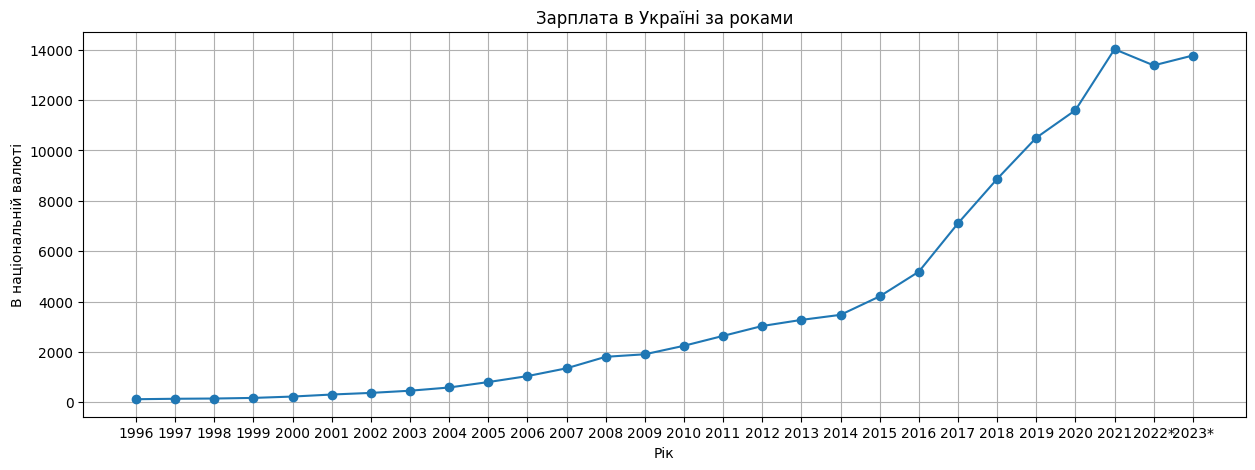

In [200]:
plt.figure(figsize=(15, 5))
plt.plot(df['Рік'], df['В національній валюті'], marker='o')
plt.xlabel('Рік')
plt.ylabel('В національній валюті')
plt.title('Зарплата в Україні за роками')
plt.grid(True)
plt.show()

14. Видаліть останній рік з таблиці та виведіть оновлену таблицю.

In [201]:
df = df.iloc[:-1]
print(df)

      Рік  В національній валюті  В доларах США
0    1996                 125.23          68.45
1    1997                 143.09          76.86
2    1998                 152.83          62.39
3    1999                 177.39          42.95
4    2000                 231.04          42.47
5    2001                 311.62          58.01
6    2002                 375.98          70.59
7    2003                 462.58          86.74
8    2004                 590.53         111.02
9    2005                 806.14         157.30
10   2006                1042.88         206.51
11   2007                1352.75         267.87
12   2008                1808.92         343.43
13   2009                1909.25         245.05
14   2010                2246.75         283.12
15   2011                2639.17         331.24
16   2012                3031.92         379.42
17   2013                3273.82         409.59
18   2014                3474.75         292.32
19   2015                4207.33        

15. Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року.

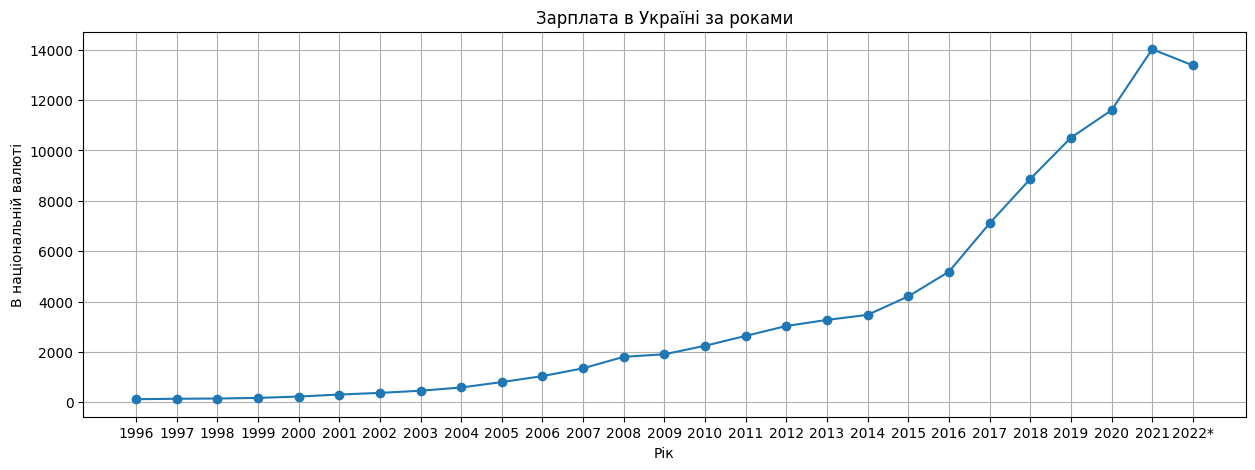

In [202]:
plt.figure(figsize=(15, 5))
plt.plot(df['Рік'], df['В національній валюті'], marker='o')
plt.xlabel('Рік')
plt.ylabel('В національній валюті')
plt.title('Зарплата в Україні за роками')
plt.grid(True)
plt.show()

16. Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку.

In [203]:
last_two_years_salary = df.iloc[-2:]['В національній валюті'].sum()
last_five_years_salary = df.iloc[-5:]['В національній валюті'].sum()

if last_two_years_salary > last_five_years_salary:
    print(f"Зарплата за останні два роки більша: {last_two_years_salary} > {last_five_years_salary}")
elif last_two_years_salary < last_five_years_salary:
    print(f"Зарплата за останні два роки менша: {last_two_years_salary} < {last_five_years_salary}")
else:
    print(f"Зарплата за останні два роки дорівнює зарплаті за останні п'ять років: {last_two_years_salary} = {last_five_years_salary}")

Зарплата за останні два роки менша: 27394.01 < 58361.689999999995


Висновок:
За виконанням цих завдань я навчилися працювати з табличними даними, а саме:

  1. Завантаження даних з віддаленого джерела за допомогою pandas.
  2. Відображення рядків таблиці для огляду даних.
  3. Визначення кількості рядків та стовпчиків у таблиці.
  4. Розрахунок загальної кількості років та місяців у наборі даних.
  5. Заміна пропущених значень на NaN для подальшої обробки.
  6. Визначення типів даних у кожному стовпці таблиці.
  7. Видалення зайвих стовпців, які не потрібні для подальшого аналізу.
  8. Приведення нечислових даних до числового формату для можливості обчислень.
  9. Визначення відсотку пропусків у кожному стовпці.
  10. Заміна пропущених значень середніми значеннями для уникнення втрати даних.
  11. Знаходження року з найвищою та найнижчою зарплатою в Україні.
  12. Виведення років, коли середня зарплата перевищувала середню за весь період.
  13. Побудова графіків для візуалізації динаміки зарплати з часом.
  14. Видалення останнього року для подальшого аналізу без цього року.
  15. Побудова графіків без останнього року для порівняння з попереднім графіком.
  16. Обчислення та порівняння зарплати за останні два роки з зарплатою за останні п'ять років.